# 疫情数据分析

In [17]:
import pandas as pd

df = pd.read_csv("covid19_day_wise.csv")
df.head()


,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


### 某日所有数据

In [18]:
print("日期列表摘取：", df["Date"][:4])

日期列表摘取： 0    2020-01-22
1    2020-01-23
2    2020-01-24
3    2020-01-25
Name: Date, dtype: object


In [19]:
print(
    "日期->索引转换：\n", 
    df[df["Date"] == "2020-02-03"]
    # df.loc[df["Date"] == "2020-02-03",:]
)


日期->索引转换：
           Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
12  2020-02-03      19887     426        604   18857       3100          64   

    New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
12            145                2.14                   3.04   

    Deaths / 100 Recovered  No. of countries  
12                   70.53                25  


### 累积确诊
2020 年 1 月 24 日之前的累积确诊病例有多少个？

In [20]:
confirmed0124 = df.loc[df["Date"] == "2020-01-24", "Confirmed"]
print("截止 1 月 24 日的累积确诊数：", confirmed0124.values)

截止 1 月 24 日的累积确诊数： [941]


### 新增死亡
2020 年 7 月 23 日的新增死亡数是多少？

In [21]:
result = df.loc[df["Date"] == "2020-07-23", "New deaths"]
print("截止 7 月 23 日的新增死亡数：", result.values)

截止 7 月 23 日的新增死亡数： [9966]


### 总增长数
从 1 月 25 日到 7 月 22 日，一共增长了多少确诊病例？

In [22]:
date = pd.to_datetime(df["Date"])
date_range = (date >= "2020-01-25") & (date <= "2020-07-22")
new_cases = df.loc[date_range, "New cases"]
overall = new_cases.sum()
print("共新增：", overall)

共新增： 15247802


In [23]:
confirmed = df.loc[:, "Confirmed"]
conf_0722 = confirmed.loc[df["Date"] == "2020-07-22"].values
conf_0125 = confirmed.loc[df["Date"] == "2020-01-25"].values

overall2 = conf_0722 - conf_0125
print("共新增：", overall2)


共新增： [15226291]


### 确诊恢复比例
每天新增确诊数和新恢复数的比例？平均比例，标准差各是多少？

In [24]:
not_zero_mask = df["New recovered"] != 0
ratio = df.loc[not_zero_mask, "New cases"] / df.loc[not_zero_mask, "New recovered"]

# 平均比例, 标准差
ratio_mean = ratio.mean()
ratio_std = ratio.std()
print("平均比例：", ratio_mean, "；标准差：", ratio_std)

平均比例： 7.049556348053241 ；标准差： 19.145284932105497


### 可视化数据
画图展示新增确诊的变化曲线

<Axes: >

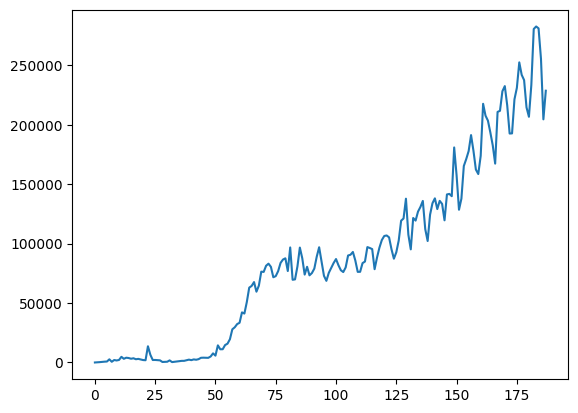

In [25]:
df["New cases"].plot()

<Axes: xlabel='x'>

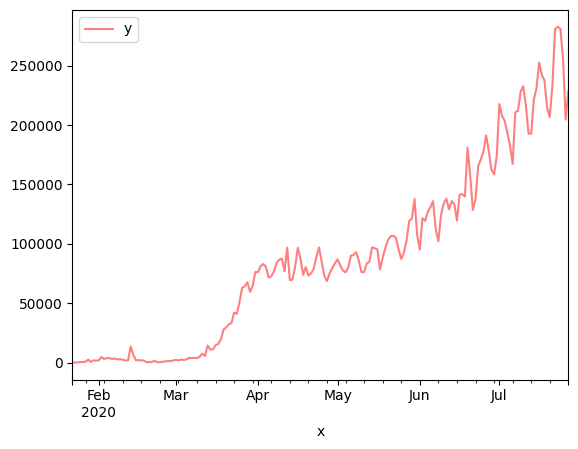

In [26]:
date = pd.to_datetime(df["Date"])
df = pd.DataFrame({
    "x": date,
    "y": df["New cases"], 
})
df.plot(x="x", y="y", alpha=.5, c="r")